# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
# Рандом
random_seed = 1488

# X и y
X = np.array(table_data.drop(['id', 'species'], axis = 1))
y = np.array(table_data['species'])

# Кодируем y
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# Сплитим так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=random_seed)

for train_index, test_index in sss.split(X, y):
    if (np.unique(y[test_index], return_counts=True)[1] == 2).all():
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        train_idx, test_idx = train_index, test_index
        break

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [9]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


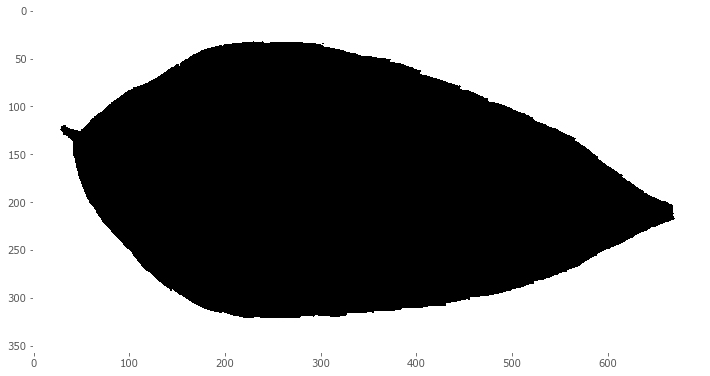

In [10]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [11]:
from skimage.transform import resize

In [12]:
img_resized = resize(img, (100, 100))

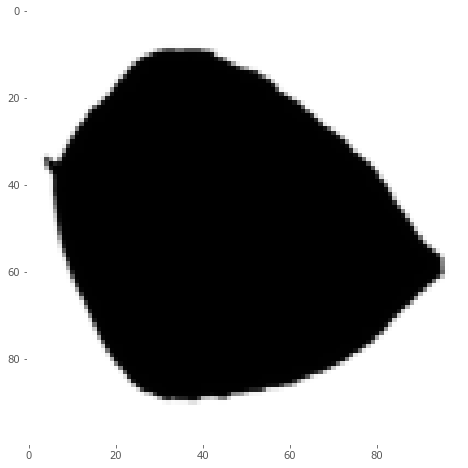

In [13]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [14]:
# Матрица изображений 
n_imgs = 1584
res = (100, 100)
imgs = np.zeros((n_imgs, res[0]*res[1]))

for i in range(1, n_imgs + 1):
    filepath = os.path.join(IMG_DIR, '%d.jpg' % i)
    img = resize(plt.imread(filepath), res)
    imgs[i - 1] = np.ravel(img)

In [15]:
# Train и test картинок
imgs_train = imgs[table_data['id'][train_idx] - 1]
imgs_test = imgs[table_data['id'][test_idx] - 1]

In [16]:
print('Train shape:', imgs_train.shape)
print('Test shape:', imgs_test.shape)

Train shape: (792, 10000)
Test shape: (198, 10000)


## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

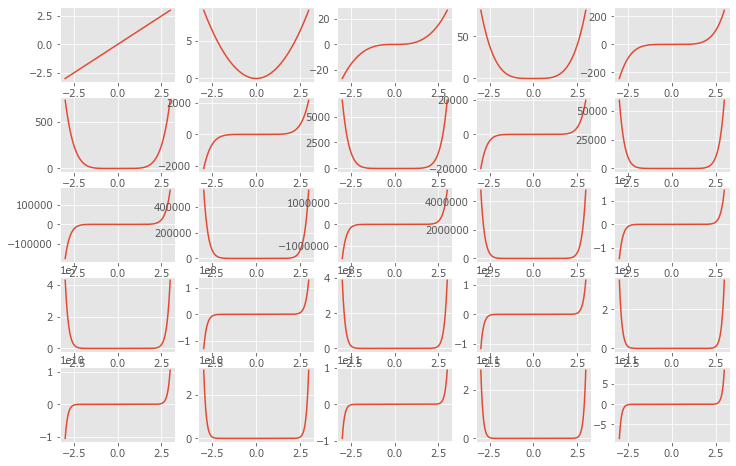

In [17]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

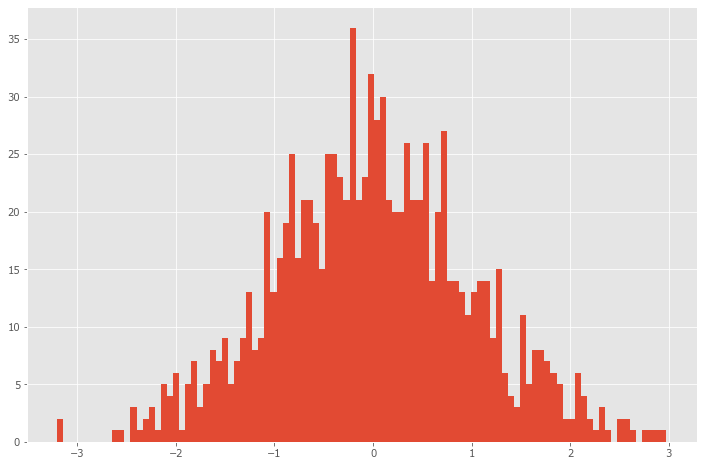

In [18]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

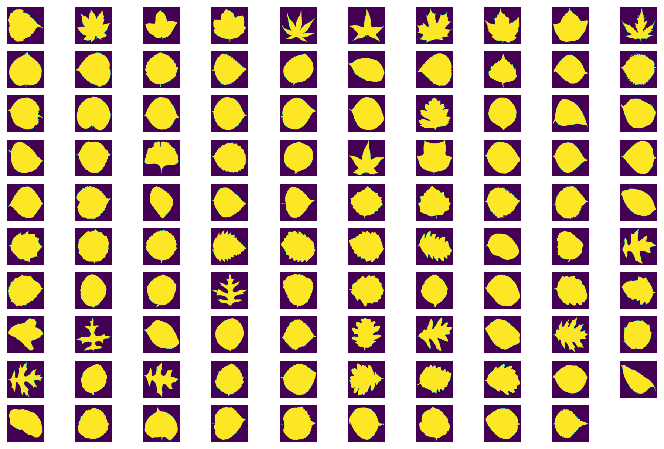

In [19]:
# Индексы уникальных листьев
leaf_class_idx = np.unique(y_train, return_index=True)[1]

for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.imshow(imgs_train[leaf_class_idx[i - 1]].reshape(res))
    # plt.title(le.inverse_transform(y_train[leaf_class_idx])[i - 1])
    plt.axis("off")

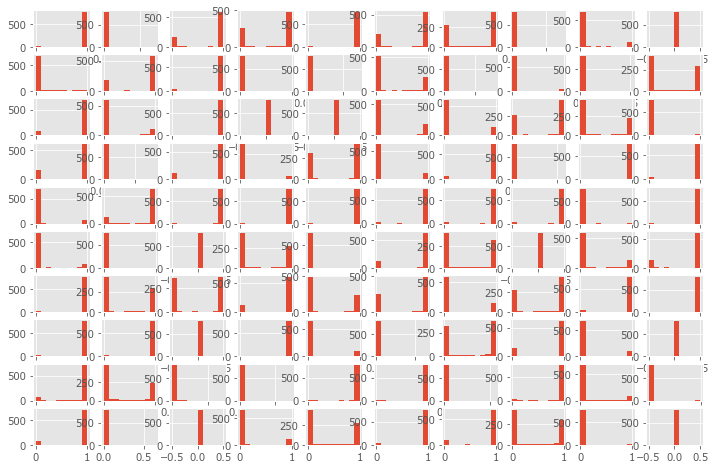

In [20]:
# 100 Гистограмм случайных пикселей
rng = np.random.default_rng(random_seed)
rand_idx = rng.choice(10001, size=100, replace=False)

for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.hist(imgs_train[:, rand_idx[i - 1]])
    # plt.title('id: %d'% rand_idx[i - 1])

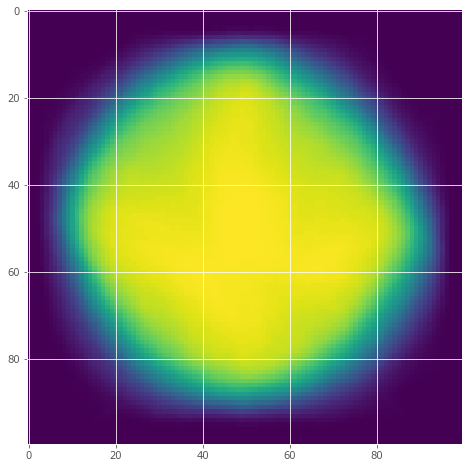

In [21]:
# Средний лист
plt.imshow(imgs_train.mean(axis = 0).reshape(res))
plt.show()

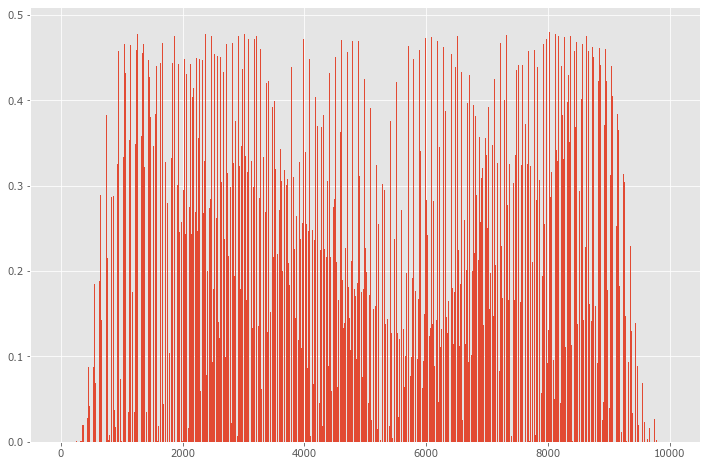

In [22]:
# Разброс каждого пикселя (1)
plt.bar(range(0, 10000), imgs_train.std(axis = 0))
plt.show()

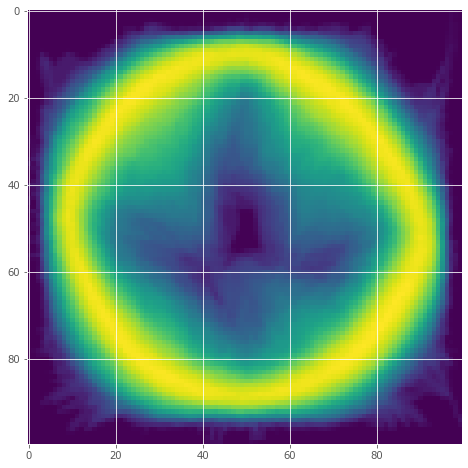

In [23]:
# Разброс каждого пикселя (2)
plt.imshow(imgs_train.std(axis = 0).reshape(res))
plt.show()

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

* Среди разных классов листьев можно выделить несколько групп. Например, листья похожие на кленовые, овальные, еловые и т.д. Тем не менее, встречаются и похожие листья среди разных классов. Также можно заметить, что листья по разному ориентированны: некоторые вертикально, а некоторые горизонтально. Данные обстоятельства непременно будут сказываться на качестве предсказаний

In [42]:
print('Максимальное значение признака:', imgs_train.max())
print('Минимально значение признака:', imgs_train.min())
print('Мода:', np.unique(imgs_train, return_counts=True)[1].argmax())
print('Медиана:', np.median(imgs_train))

Максимальное значение признака: 1.0
Минимально значение признака: 0.0
Мода: 0
Медиана: 0.00041411764705870456


* Миниальное значение 0 означает белый цвет, максимальное 1 - черный цвет. Тогда множество от 0 до 1, где промежуточные значения означают края листа, которые образавались в результате масштабирования. Чаще всего встречаются 0, т.е. белый цвет - места где нет листа. Более того, есть несколько классов распределений признаков: на одних встречаются только нули, на других только единицы, тогда как есть те, где встречаются как нули так и единицы - это и есть ключевые признаки по которым отличаются листы, скорее всего их крайние точки.

* На мой взгляд, бинализировать изображения без сильной потери инфромации можно, ведь изначальные картинки были как раз бинарные. Думаю, стоит взять порог 0.5 для классификации на черный или белый. С другой стороны, можно подобрать этот параметр таким образом, чтобы качество на обучающей выборке было максимальным.

* С моей точки зрения, средний лист не совсем похож на лист. Однако он отображает то, что большинство листов кругловаты, а расплывчатость по краям означает, что именно краями листы и отличаются между собой. Диаграмма стандартных отклонений также доказывает тот факт, что листы значительно отличаются по краям. Также есть группа константных признаков. Они сосредоточены посередине и по краям изображения, т.е. в центре листа и там, где листьев нет.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [87]:
from sklearn.cluster import KMeans

# Обучение. 9 кластеров
kmeans = KMeans(n_clusters=9,
                random_state=random_seed).fit(imgs_train)

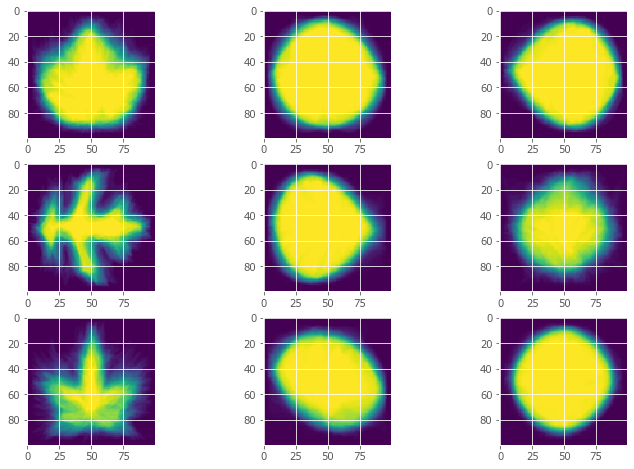

In [89]:
# Визуализация
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(kmeans.cluster_centers_[i - 1].reshape(res))
    #plt.axis("off")

In [90]:
# Обучение. 25 кластеров
kmeans = KMeans(n_clusters=25,
                random_state=random_seed).fit(imgs_train)

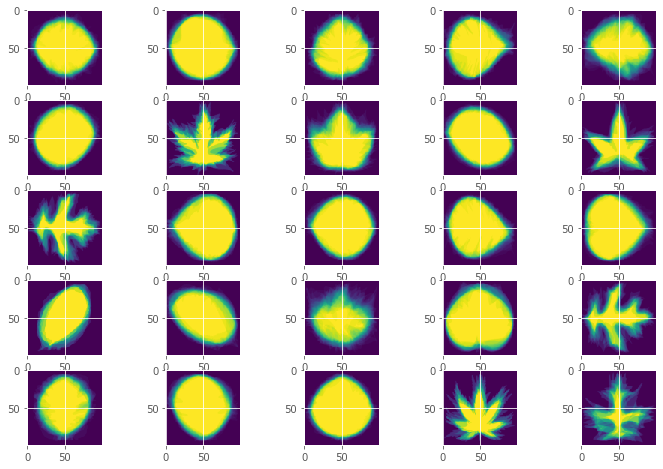

In [91]:
# Визуализация
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(kmeans.cluster_centers_[i - 1].reshape(res))
    #plt.axis("off")

In [92]:
# Обучение. 100 кластеров
kmeans = KMeans(n_clusters=100,
                random_state=random_seed).fit(imgs_train)

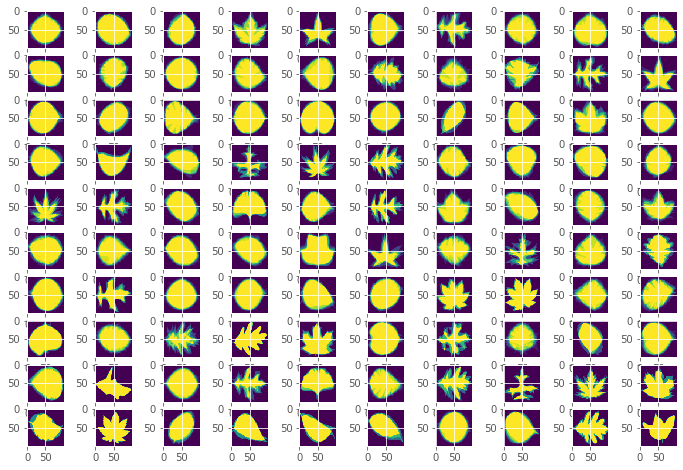

In [93]:
# Визуализация
for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.imshow(kmeans.cluster_centers_[i - 1].reshape(res))
    #plt.axis("off")

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

* Центры кластеров действительно похожи на листья, однако можно заметить, что границы листьев весьма расплывчаты, что характерно даже для кластеризации на 100 классов

* Отличие картинок от реальных листьев в первую очередь выражается в нечеткости краев. Также можно встретить объекты, которые не совсем похожи на листья. Причина этого отличия состоит прежде всего в усреднении значений признаков в рамках одного класса, что и создает неточные края.

* Среди кластеров, особенно когда их становится много, наблюдается весьма много повторяющихся листьев. Возможно, это связано с тем, что случайные первоначальные точки алгоритма сходятся в близкие центры, отчего и появляются схожие классы.

* С моей точки зрения, для решения текущей задачи, больше подойдет большое количество кластеров. Видно, что на диаграмме 100 кластеров листья более четкие и различимые, в то время как на предыдущих - встречаются очень расплывчатые изображения листьев. Тем не менее, при большом числе кластеров листья начинают повторятся, что несколько ухудшает модель.

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [99]:
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def metrics(X, y):
    print('Accuracy score =', accuracy_score(X, y))

In [121]:
# Центроидный классификатор
NCCl = NearestCentroid().fit(imgs_train, y_train)

metrics(NCCl.predict(imgs_test), y_test)

Accuracy score = 0.5757575757575758


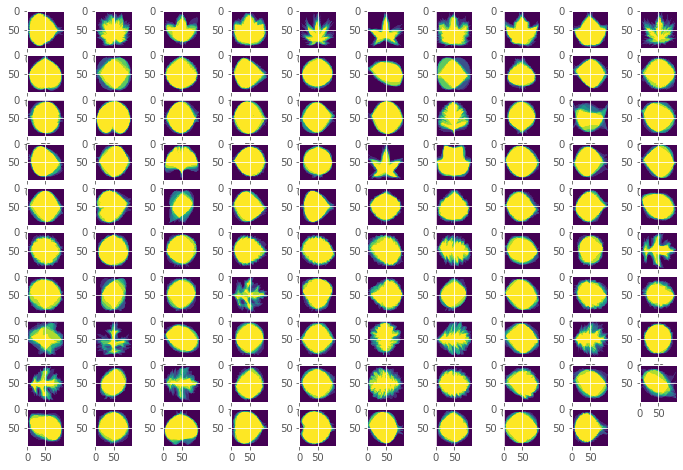

In [106]:
# Визуализация NearestCentroid
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.imshow(NCCl.centroids_[i - 1].reshape(res))
    #plt.axis("off")

In [124]:
# Мультиномиальный наивный байесовский классификатор
MltCl = MultinomialNB().fit(imgs_train, y_train)

metrics(MltCl.predict(imgs_test), y_test)

Accuracy score = 0.51010101010101


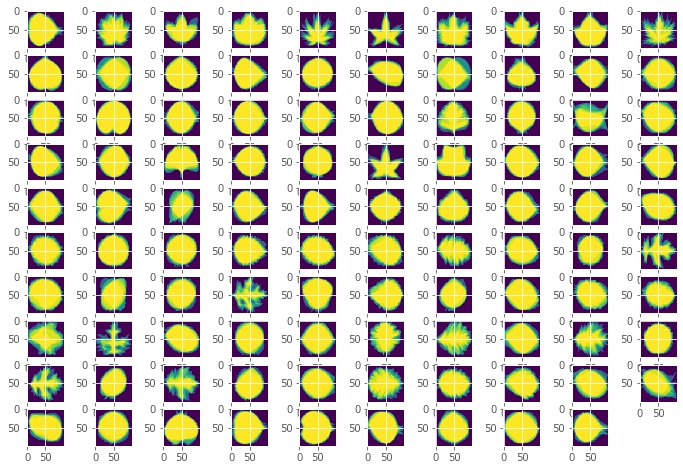

In [125]:
# Визуализация MultinomialNB
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.imshow(MltCl.feature_log_prob_[i - 1].reshape(res))
    #plt.axis("off")

In [118]:
# LogisticRegression
LogCl = LogisticRegression(random_state=random_seed).fit(imgs_train, y_train)

metrics(LogCl.predict(imgs_test), y_test)

Accuracy score = 0.6717171717171717


c:\users\nikir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


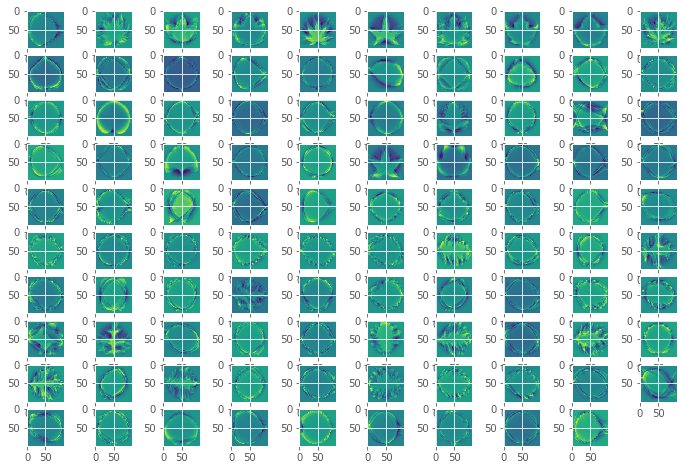

In [119]:
# Визуализация LogisticRegression
for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.imshow(LogCl.coef_[i - 1].reshape(res))
    #plt.axis("off")

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

* В данной задаче логистическая регрессия показала наилучший результат. На мой взгляд, это связано с тем, что центроидный классификатор просто усредняет классы и предсказывает похожие, мультиномиальный классификатор решает задачу схожим образом максимизируя функцию правдоподобия. В то же время, логистическая регрессия обучает 99 алгоритмов 1vsAll, фиксируя более сложные отличия каждого класса от других листьев, т.е. используя информацию о всей выборке для задачи классификации каждого листа.
* Картинки центров кластеров, вероятности, а также веса похожи на изображения листов. Тем не менее расплывчатость бросается в глаза.
* Картинка линейного классификатора другая, поскольку веса имеют меньшие значения в отличие от значений изначальных признаков, которые используются в центроидной и мультиномиальной классификации. 

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [150]:
from sklearn.ensemble import RandomForestClassifier

# Случайный лес
RFCl = RandomForestClassifier(n_estimators=100, 
                              criterion='gini',
                              random_state = random_seed).fit(imgs_train, y_train)

metrics(RFCl.predict(imgs_test), y_test)
RF_sc = accuracy_score(RFCl.predict(imgs_train), y_train), accuracy_score(RFCl.predict(imgs_test), y_test) # Для 4 задания

Accuracy score = 0.5505050505050505


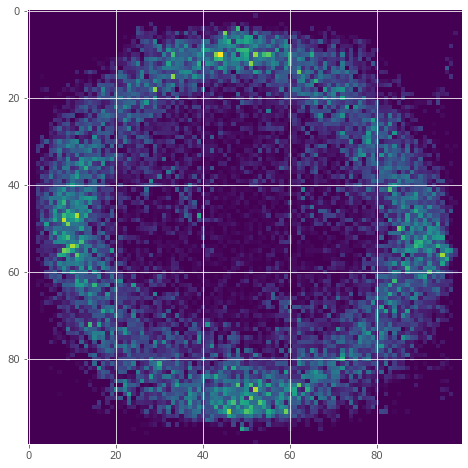

In [151]:
# Визуализация RandomForestClassifier
plt.imshow(RFCl.feature_importances_.reshape(res))
plt.show()

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

* Картинка совсем не похожа на изображение листа. Тем не менее, она напоминает диаграмму разброса значений каждого пикселя.
* На мой взгляд, изображение соответсвует логике алгоритма RF, ведь наиболее важные признаки, по которым можно классифицировать лист, лежат как раз в данном круге.

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [173]:
from sklearn.decomposition import PCA

num_components = 2**np.arange(10)

In [176]:
# Обучение PCA

train_score = []
test_score = []

for i in num_components:
    pca = PCA(n_components=i,
             random_state=random_seed)
    train_fit = pca.fit_transform(imgs_train)
    test_fit = pca.fit_transform(imgs_test)
    RFCl = RandomForestClassifier(n_estimators=100, 
                              criterion='gini',
                              random_state = random_seed).fit(train_fit, y_train)
    train_score.append(accuracy_score(RFCl.predict(train_fit), y_train))
    test_score.append(accuracy_score(RFCl.predict(test_fit), y_test))

ValueError: n_components=256 must be between 0 and min(n_samples, n_features)=198 with svd_solver='full'

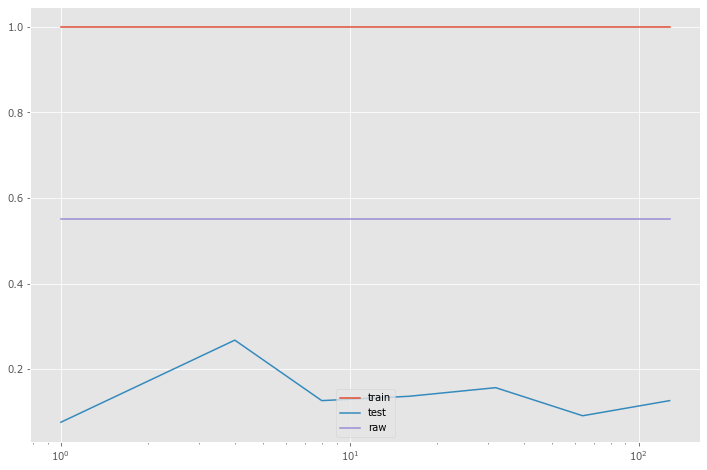

In [192]:
plt.plot(num_components[:-2], train_score, label = 'train')
plt.plot(num_components[:-2], test_score, label = 'test')
plt.plot(num_components[:-2], np.ones(8)*RF_sc[1], label = 'raw')
plt.legend()
plt.xscale("log")
plt.show()

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [194]:
# Случайный лес
RFCl = RandomForestClassifier(n_estimators=100, 
                              criterion='gini',
                              random_state = random_seed).fit(X_train, y_train)

metrics(RFCl.predict(X_test), y_test)

Accuracy score = 0.9797979797979798


* Качество модели колоссально выросло в сравнении с классификацией на изображениях. Предположу, что табличные данные были образованы от изображений с помощью нейросетей, в результате чего, там зафиксированы более сложные зависимости и формы, которые труднодоступны для RF на сырых изображениях.

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [200]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [202]:
grid_searcher = GridSearchCV(
    RandomForestClassifier(),
    scoring='accuracy',
    param_grid={
        'max_leaf_nodes': [15, 31, 62, None], # Макс. кол-во биений
        'min_samples_leaf': [1, 2, 8, 14, 21, 50, 100], #  Мин. кол-во объектов в листе
        'n_estimators': [10, 50, 100, 200, 500, 1000], # Кол-во деревьев
        'random_state': [random_seed]},
    cv=StratifiedKFold(4))

grid_searcher.fit(X_train, y_train)
grid_searcher.best_params_

{'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'n_estimators': 1000,
 'random_state': 1488}

In [203]:
metrics(grid_searcher.predict(X_test), y_test)

Accuracy score = 0.9848484848484849


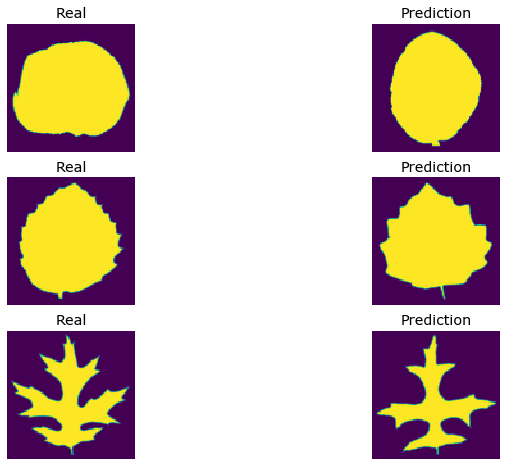

In [223]:
n_errors = len(imgs_test[grid_searcher.predict(X_test) != y_test])

fig, ax = plt.subplots(n_errors, 2, )
for i in range(0, n_errors):
    ax[i, 0].imshow(imgs_test[grid_searcher.predict(X_test) != y_test][i].reshape(res))
    ax[i, 0].set_title('Real')
    ax[i, 0].axis('off')
    pic_cl = grid_searcher.predict(X_test)[grid_searcher.predict(X_test) != y_test][i]
    ax[i, 1].imshow(imgs_train[np.where(y_train == pic_cl)[0][0]].reshape(res))
    ax[i, 1].set_title('Prediction')
    ax[i, 1].axis('off')

* С помощью перебора параметров и кросс-валидации удалось добиться еще большей точности на тестовой выборке. Даже на неправильно предсказанных листьях видно, что классификатор хорошо справляется с задачей. Предсказанные листы весьма похожи на реальные, особенно на последней картинке. 